In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from google.colab import files
titanic = files.upload()


Saving titanic.csv to titanic.csv


In [9]:
df = pd.read_csv('titanic.csv')
df.head(3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


### **1.To calculate median age we need to get rid of 177 data where age is missing.**

In [12]:
df2 = df.dropna(subset=['Age'])
df2.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [13]:
df3=df2[df2['Embarked'] == 'C']
df3.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,453.323077,0.607692,1.746154,30.814769,0.423077,0.415385,68.296767
std,254.534724,0.490153,0.909140,15.434860,0.568766,0.690855,90.557822
min,2.000000,0.000000,1.000000,0.420000,0.000000,0.000000,4.012500
25%,256.750000,0.000000,1.000000,21.250000,0.000000,0.000000,14.454200
50%,455.000000,1.000000,1.000000,29.000000,0.000000,0.000000,36.252100
75%,661.500000,1.000000,3.000000,40.000000,1.000000,1.000000,81.428100
max,890.000000,1.000000,3.000000,71.000000,2.000000,3.000000,512.329200


In [15]:
median_age = df['Age'].median()
print(f' The median age of passengers who embarked at Cherbourg is {median_age}')

 The median age of passengers who embarked at Cherbourg is 28.0


### **2. We can use df2 dataset to plot the pie chart for the proportion of passengers in each age group.**

<ipython-input-50-d9a129bcce7b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Age Group'] = pd.cut(df2['Age'], bins=bins, labels=labels, right=True)


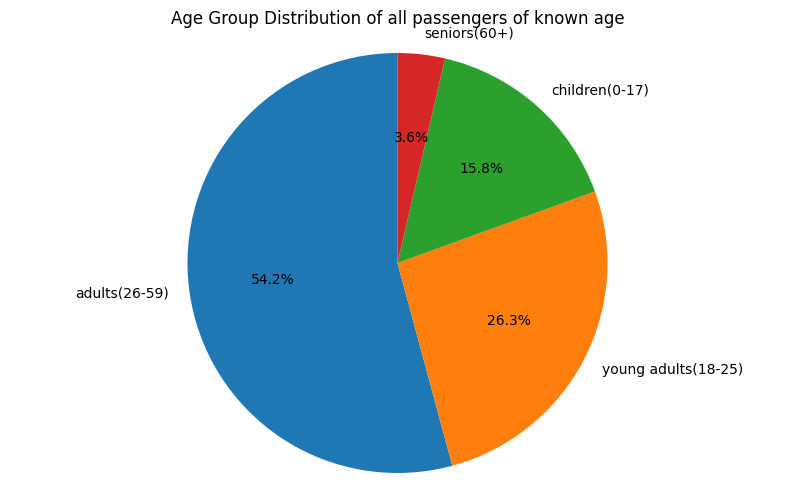

In [50]:
bins=[0, 17, 25, 59, 100]
labels=['children(0-17)', 'young adults(18-25)', 'adults(26-59)', 'seniors(60+)']
df2['Age Group'] = pd.cut(df2['Age'], bins=bins, labels=labels, right=True)
age_group_counts = df2['Age Group'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Age Group Distribution of all passengers of known age')
plt.axis('equal')
plt.show()

In [34]:
df5=df[(df['SibSp']==0) & (df['Parch']==0)]
df5.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,537.000000,537.000000,537.000000,404.000000,537.0,537.0,537.000000
mean,458.000000,0.303538,2.400372,32.220297,0.0,0.0,21.242689
std,255.714174,0.460214,0.804511,12.899871,0.0,0.0,42.223510
min,3.000000,0.000000,1.000000,5.000000,0.0,0.0,0.000000
25%,235.000000,0.000000,2.000000,22.000000,0.0,0.0,7.775000
50%,466.000000,0.000000,3.000000,29.500000,0.0,0.0,8.137500
75%,681.000000,1.000000,3.000000,39.000000,0.0,0.0,15.000000
max,891.000000,1.000000,3.000000,80.000000,0.0,0.0,512.329200


### 3. Survival rate = ((total survivors in df5)/(total passengers in df5))*100

In [39]:
x=df5['Survived'].sum()
y= len(df5)
z= (x/y)*100
print(f'Survival rate of passengers with Sibsp=0 and Parch=0 is {z:4.2f}% ')

Survival rate of passengers with Sibsp=0 and Parch=0 is 30.35% 


### **4. To obtain the maximum fare paid by dead passenger, we need to form a dataset df6 where Survived == 0. Then from df6 we can find the max fare.**

In [48]:
df6 = df[df['Survived']==0]
max_fare = df6['Fare'].max()
print(f'The maximum fare paid by passengers who did not survive is {max_fare}')

The maximum fare paid by passengers who did not survive is 263.0


### **5. To create a scatter plot for fare vs age while having different markers for each embarkation point, we need to remove missing data for Age, Fare and Embarked columns. Let this new dataset be df7.**

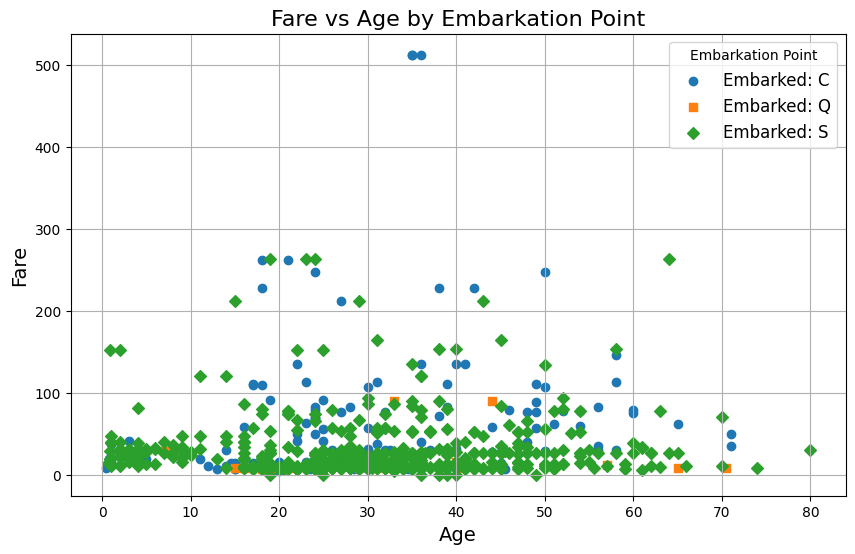

In [59]:
df7=df = df.dropna(subset=['Age', 'Fare', 'Embarked'])
markers = {'C': 'o', 'Q': 's', 'S': 'D'}
plt.figure(figsize=(10, 6))
for i,j in markers.items():
    ds = df[df['Embarked'] == i]
    plt.scatter(ds['Age'], ds['Fare'], label=f'Embarked: {i}', marker=j)

plt.title('Fare vs Age by Embarkation Point', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Fare', fontsize=14)
plt.legend(title='Embarkation Point', fontsize=12)
plt.grid()
plt.show()


### **6. To count the number of passengers in class by gender we need to use groupby method of pandas in df.**

In [60]:
passengers = df.groupby(['Pclass', 'Sex']).size()
print(passengers)


Pclass  Sex   
1       female     83
        male      101
2       female     74
        male       99
3       female    102
        male      253
dtype: int64
